## Import Python Libraries

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

## Reading Dataset

In [3]:
data = pd.read_csv('Seoul Bike Rental.csv')
data

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/18,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/18,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/18,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/18,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Convert the dataset into DataFrame

In [4]:
df = pd.DataFrame(data)
df

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/18,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/18,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/18,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/18,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Display first 3 entries in the DataFrame

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Display last 3 entries in the DataFrame

In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/18,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/18,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/18,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/18,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/18,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Display total number of rows and columns in the DataFrame

In [11]:
df.shape

(8760, 14)

### List the columns in the DataFrame

In [12]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Display total number of Elements in the DataFrame

In [13]:
df.size

122640

### Provides information about the DataFrame¶

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(∞C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(∞C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Descriptive Analysis

In [15]:
df.describe()

,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Display data type of all columns in the DataFrame

In [16]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(∞C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(∞C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## Data Cleaning

In [17]:
df.isnull()               # Checking for Null values - Missing or unknown values

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isna()                # Checking for NAN Values - undefined value or value that cannot be represented, especially results of floating-point calculations.

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()     

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [20]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(∞C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(∞C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [21]:
df.duplicated().sum()       # Checking of Duplicate values

0

In [22]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(∞C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(∞C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

Changing the data type of a column

In [23]:
df['Humidity(%)'] = df['Humidity(%)'].astype('float')

In [24]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(∞C)              float64
Humidity(%)                  float64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(∞C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

/var/folders/f7/gjll69yd355_nyw96sjj1dwc0000gn/T/ipykernel_118/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [26]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(∞C)                     float64
Humidity(%)                         float64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(∞C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

## Value Count of a column

In [38]:
a = df['Holiday'].value_counts()
a

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

## Unique Values of a column

In [40]:
b = df['Humidity(%)'].unique()
b

array([37., 38., 39., 40., 36., 35., 27., 24., 21., 23., 25., 26., 54.,
       58., 66., 77., 79., 81., 83., 84., 87., 86., 82., 68., 57., 49.,
       41., 48., 51., 53., 52., 55., 56., 69., 71., 73., 75., 91., 92.,
       89., 85., 76., 90., 88., 47., 30., 29., 32., 43., 45., 44., 42.,
       34., 33., 31., 28., 46., 59., 78., 70., 64., 60., 94., 93., 96.,
       65., 50., 74., 63., 61., 72., 62., 22., 67., 80., 95., 15., 20.,
       17., 18., 16., 19., 14., 97., 98., 10., 13., 12., 11.,  0.])

## Draw plots using MAPLOTLIB and SEABORN Libraries

### Line Plot

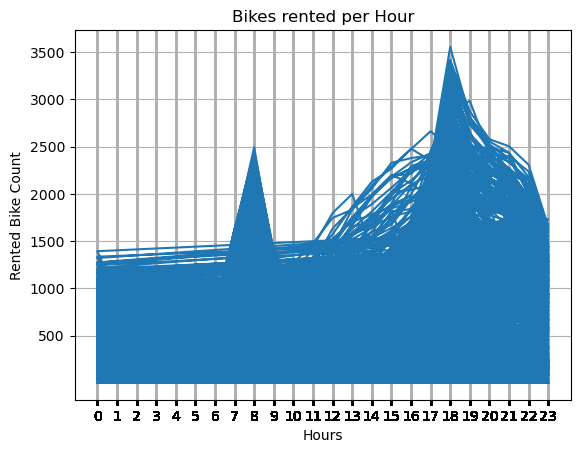

In [27]:
plt.plot(df['Hour'], df['Rented Bike Count'])
plt.title('Bikes rented per Hour')
plt.xlabel('Hours')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.xticks(df['Hour'])
plt.yticks([500,1000,1500,2000,2500,3000,3500])
plt.show()

### Bar Chart

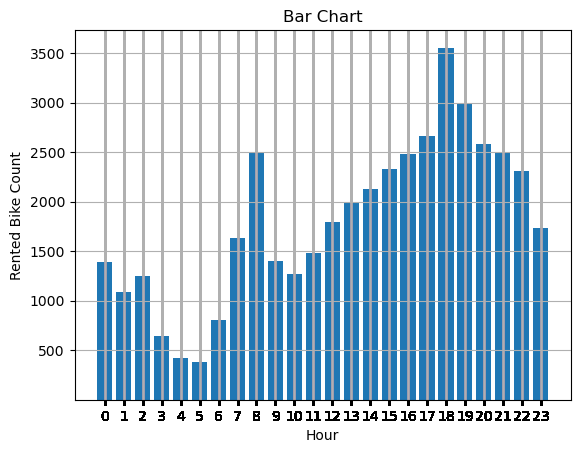

In [28]:
plt.bar(df['Hour'], df['Rented Bike Count'])
plt.title('Bar Chart')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.xticks(df['Hour'])
plt.yticks([500,1000,1500,2000,2500,3000,3500])
plt.show()

### HistoGraph

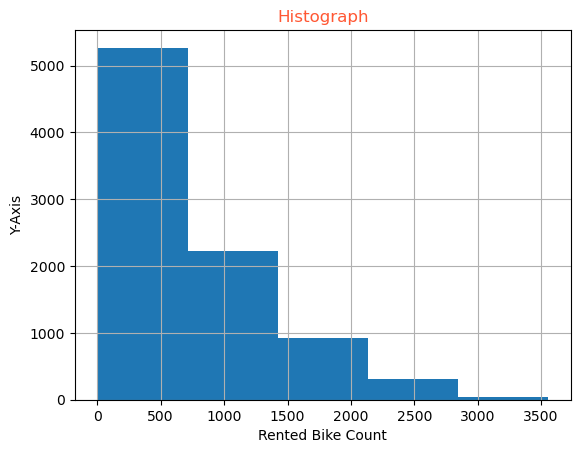

In [29]:
plt.hist(df['Rented Bike Count'], bins = 5)
plt.title('Histograph', color='#FF5733')
plt.xlabel('Rented Bike Count')
plt.ylabel('Y-Axis')
plt.grid(True)
plt.show()

In [ ]:
### Pie Chart

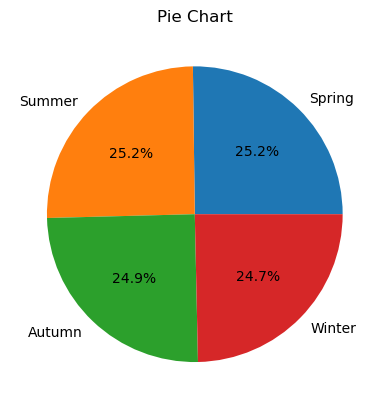

In [242]:
ss_count = df['Seasons'].value_counts()
plt.pie(ss_count, labels = ss_count.index , autopct = '%1.1f%%')
plt.title('Pie Chart')

plt.show()

### Scatter Plot

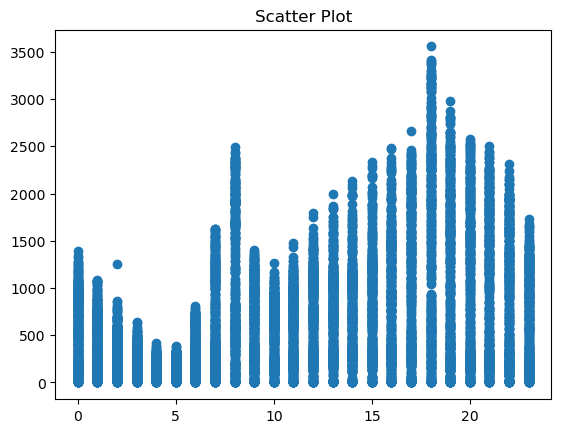

In [32]:
plt.scatter(df['Hour'], df['Rented Bike Count'])
plt.title('Scatter Plot')
plt.show()

## Seaborn

### Line Plot

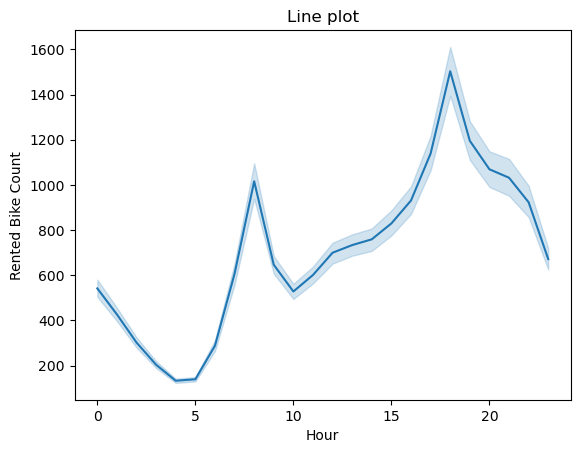

In [33]:
sns.lineplot(x=df['Hour'], y=df['Rented Bike Count'], data=df)
plt.title('Line plot')
plt.show()

### Scatter Plot

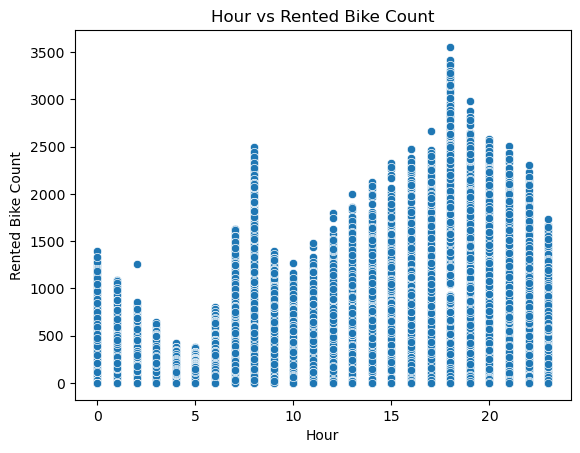

In [34]:
sns.scatterplot(x=df['Hour'], y=df['Rented Bike Count'], data=df)
plt.title('Hour vs Rented Bike Count')
plt.show()

### Bar Plot

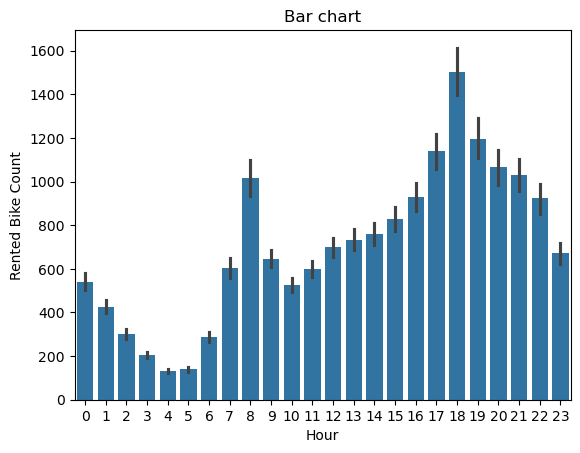

In [35]:
sns.barplot(x=df['Hour'], y=df['Rented Bike Count'], data=df)
plt.title('Bar chart')
plt.show()

### Historgraph

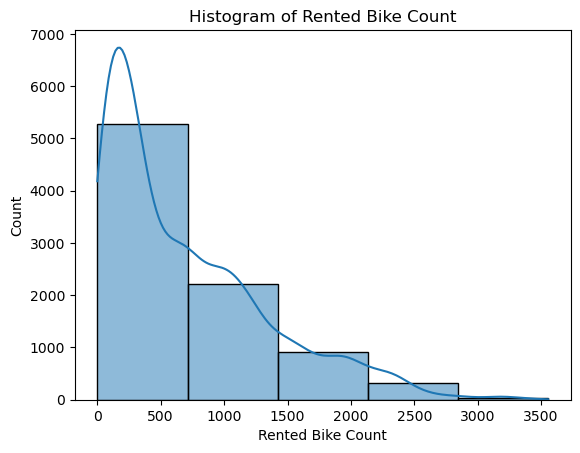

In [36]:
sns.histplot(x = df['Rented Bike Count'], data = df, bins = 5, kde = True)  # Bins represent the range of values
plt.title('Histogram of Rented Bike Count')
plt.show()

### Pie Chart

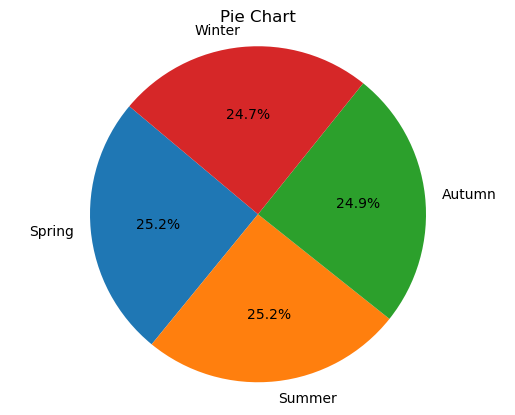

In [243]:
plt.pie(ss_count, labels = ss_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.axis('equal')               
plt.show()

## Shape of Distribution Data

### Skewness

In [45]:
# Skewness for all numerical values
sk = df.select_dtypes(include = 'number').skew()
sk

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(∞C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(∞C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
dtype: float64

### Kurtosis

In [49]:
k = df.select_dtypes(include = 'number').kurt()
k

Rented Bike Count              0.853387
Hour                          -1.204176
Temperature(∞C)               -0.837786
Humidity(%)                   -0.803559
Wind speed (m/s)               0.727179
Visibility (10m)              -0.961980
Dew point temperature(∞C)     -0.755430
Solar Radiation (MJ/m2)        1.126433
Rainfall(mm)                 284.991099
Snowfall (cm)                 93.803324
dtype: float64

## Mean value for the numerical columns 

In [47]:
mn = df.select_dtypes(include = 'number').mean()
mn

Rented Bike Count             704.602055
Hour                           11.500000
Temperature(∞C)                12.882922
Humidity(%)                    58.226256
Wind speed (m/s)                1.724909
Visibility (10m)             1436.825799
Dew point temperature(∞C)       4.073813
Solar Radiation (MJ/m2)         0.569111
Rainfall(mm)                    0.148687
Snowfall (cm)                   0.075068
dtype: float64

In [52]:
pr = df['Rented Bike Count'].corr(df['Hour'], method = 'pearson')
pr

0.4102572913224859

## Finding Outliers using box plot

<Axes: >

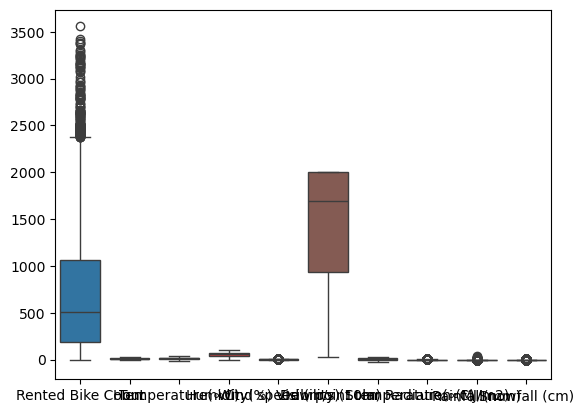

In [53]:
sns.boxplot(data = df)

## Caping/Imputing outlier data point using IQR

In [54]:
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
#define bounds(lower and upper)
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
#removing outliers
    clean_data=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)][col]

## Function to apply IQR method to fix outliers

In [58]:
def fix_outliers_iqr(df):     
    num = df.select_dtypes(include='number').columns
    for col in num: 
        q1 = df[col].quantile(0.25) 
        q3 = df[col].quantile(0.75) 
        iqr = q3 - q1 
        lower_bound = q1 - 1.5 * iqr 
        upper_bound = q3 + 1.5 * iqr 
# Replace outliers with the respective bounds 
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x) 
    return df

In [59]:
df1 = fix_outliers_iqr(df)
df1.head(4)

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254.0,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204.0,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173.0,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107.0,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Box plot with capped/imputed outlier

<Axes: >

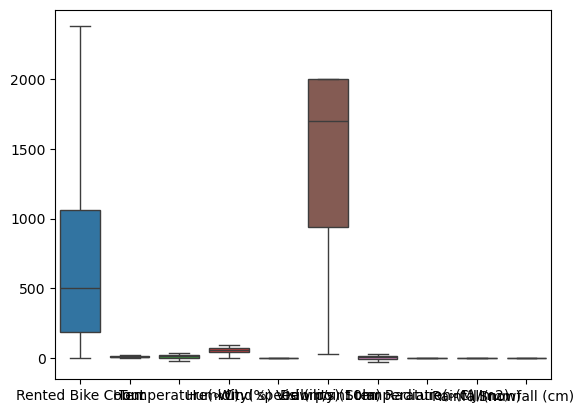

In [60]:
sns.boxplot(data = df1)

## Correlation between all Numerical Columns

In [50]:
cr = df.select_dtypes(include = 'number').corr()
cr

,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(∞C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(∞C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


## Plot HeatMap

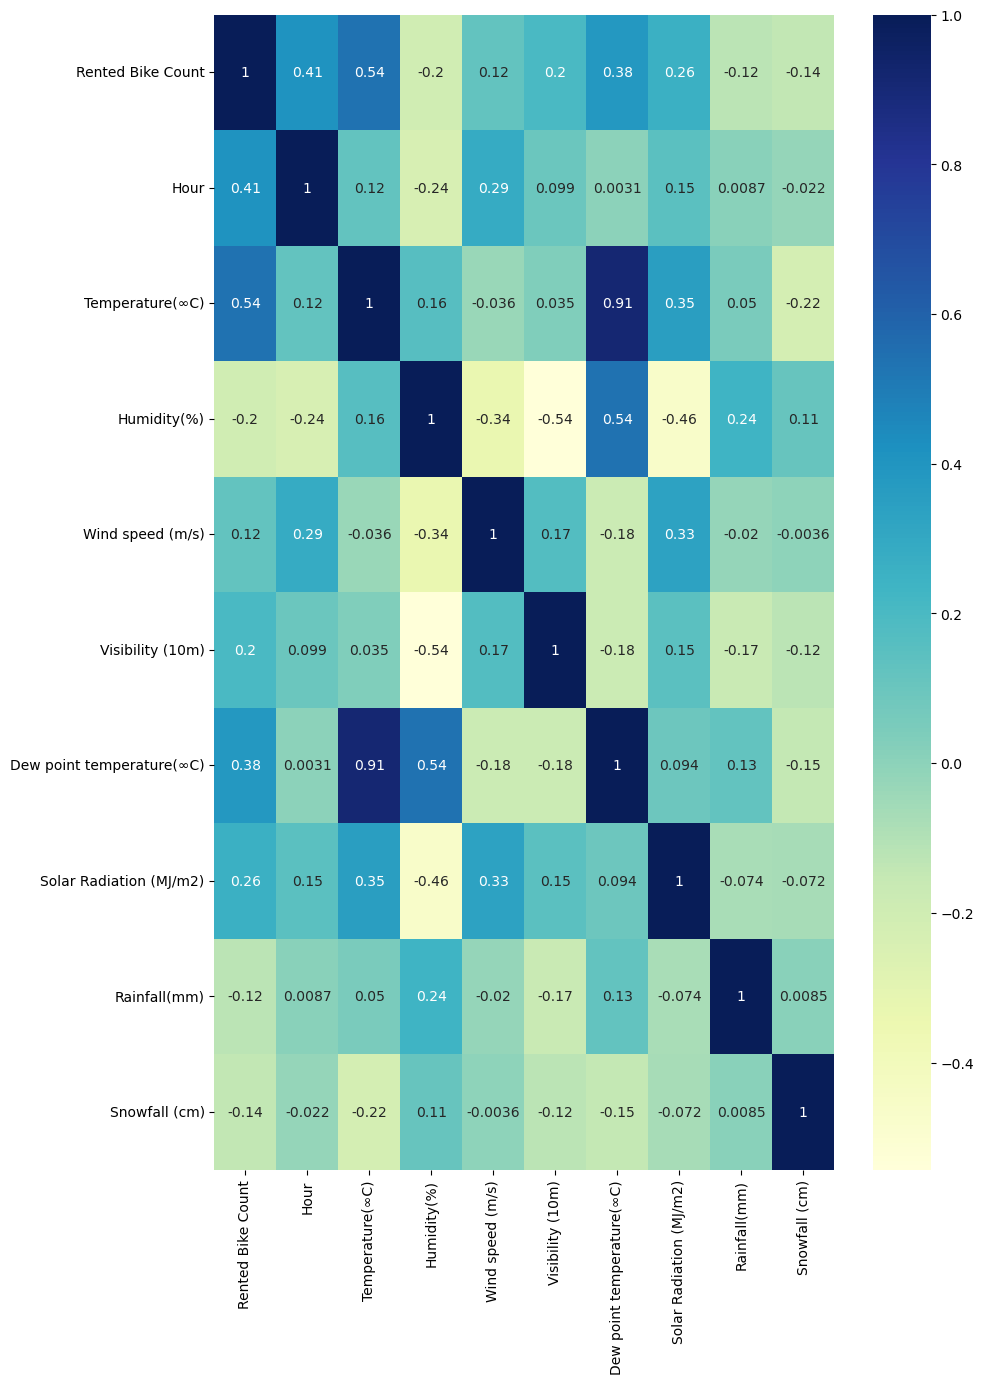

In [63]:
plt.figure(figsize=(10,15))
sns.heatmap(cr, annot=True, cmap='YlGnBu')
plt.show()

## SKEWNESS USING POWER TRANSFORMER FROM SKLEARN

In [65]:
pt = PowerTransformer(method='yeo-johnson')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [66]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [67]:
df_transformed.skew()

Rented Bike Count           -0.140727
Hour                        -0.241479
Temperature(∞C)             -0.234084
Humidity(%)                 -0.068317
Wind speed (m/s)            -0.002993
Visibility (10m)            -0.520803
Dew point temperature(∞C)   -0.124635
Solar Radiation (MJ/m2)      0.550148
Rainfall(mm)                 0.000000
Snowfall (cm)                0.000000
dtype: float64

## Plotting Hist plot

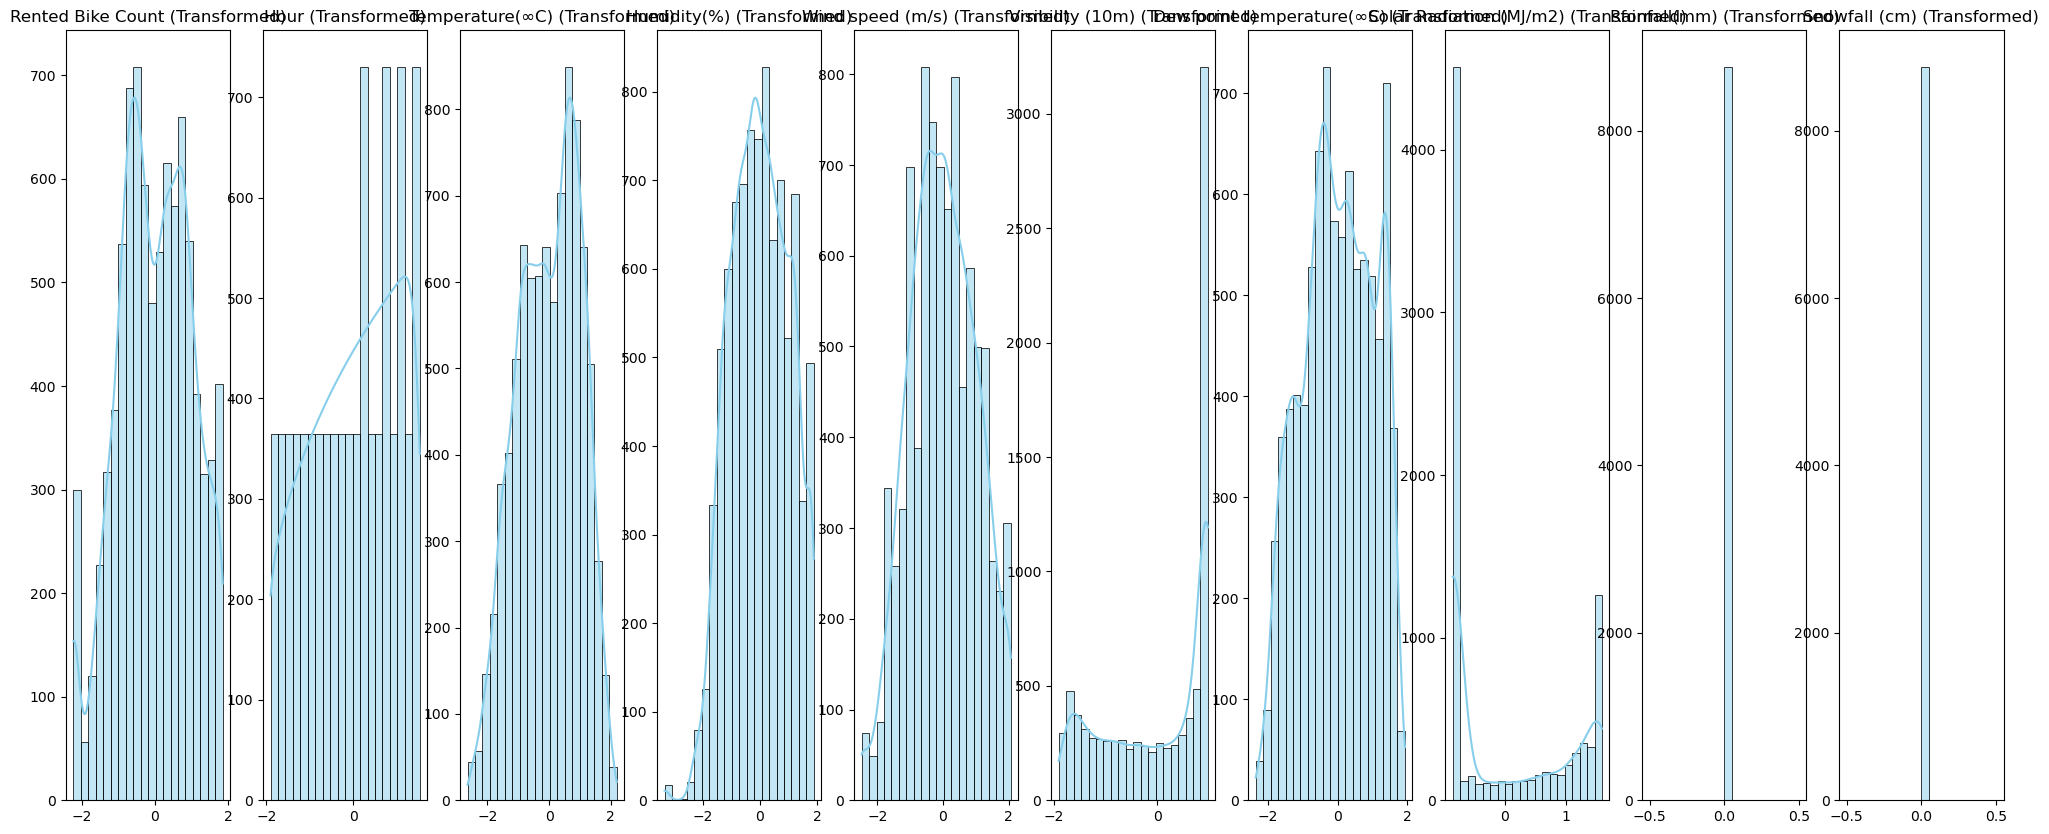

In [68]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

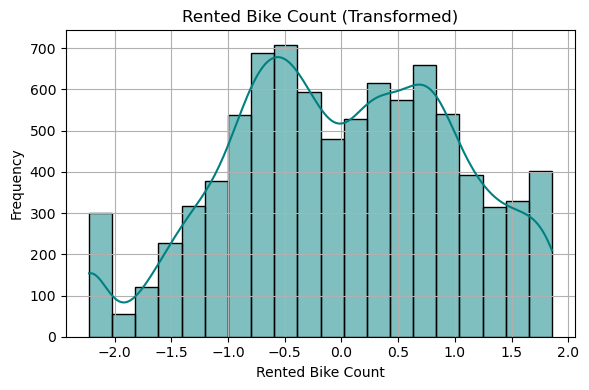

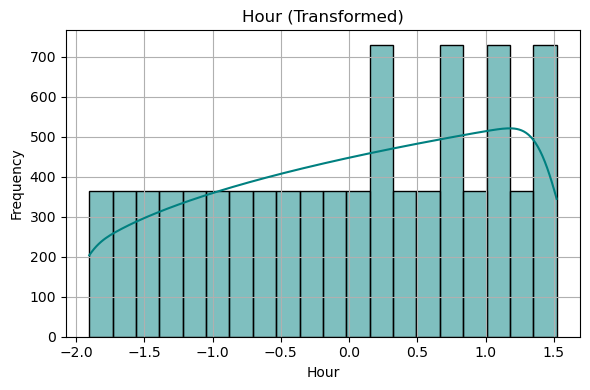

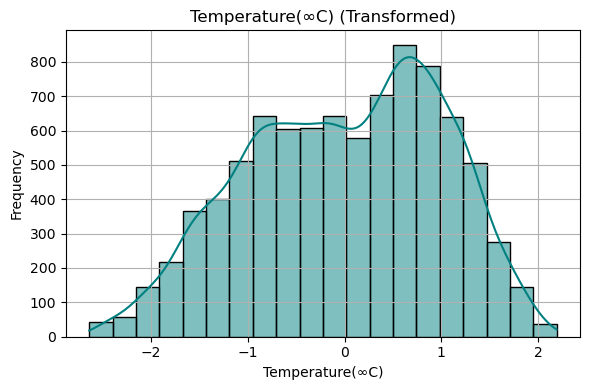

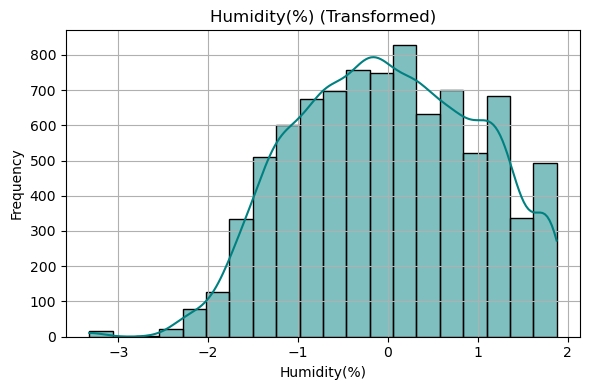

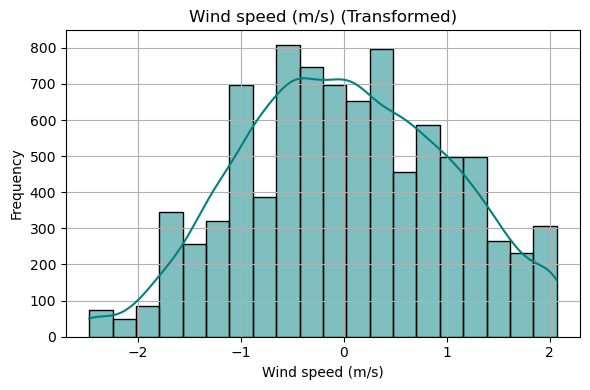

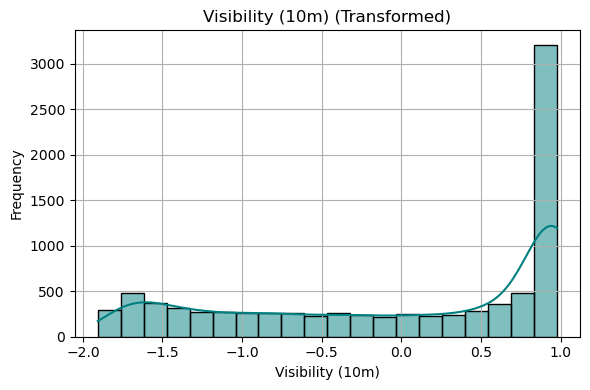

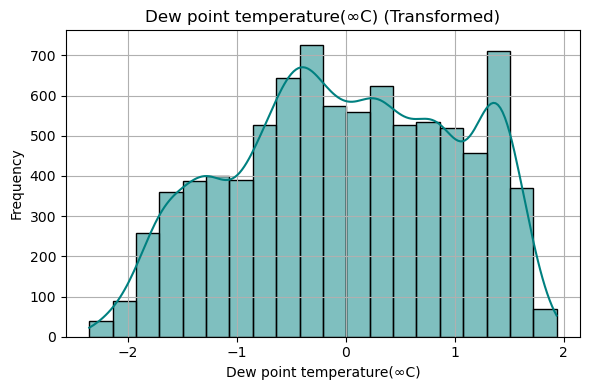

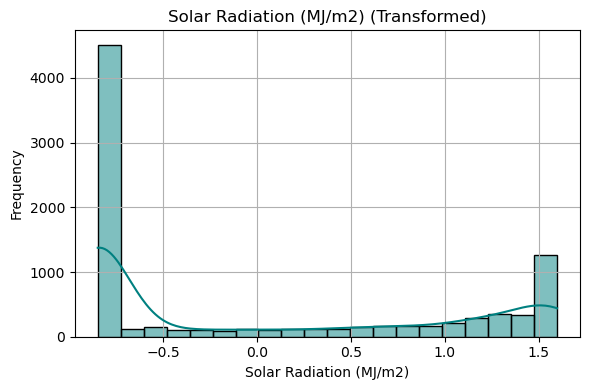

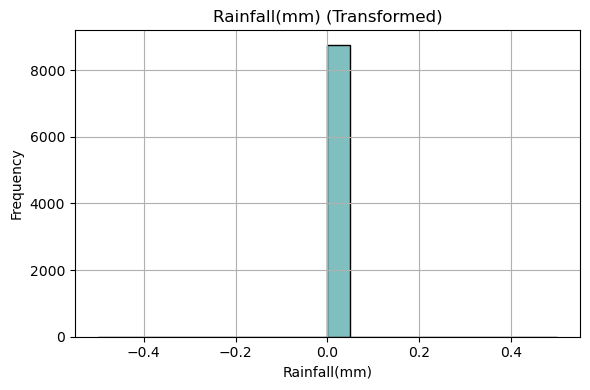

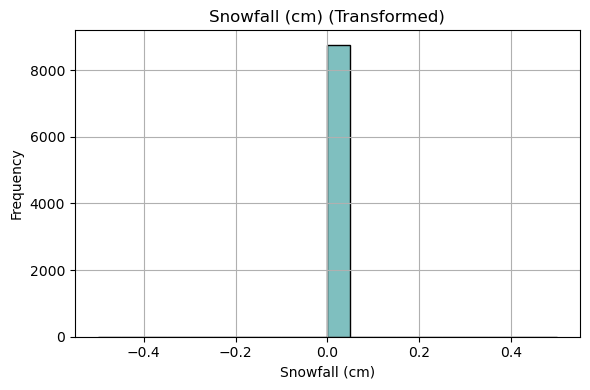

In [69]:
# Plot each column individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Encoding target variable using Label encoder

In [71]:
df

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254.0,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204.0,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173.0,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107.0,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78.0,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.0,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764.0,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694.0,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712.0,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [72]:
le = LabelEncoder()
df['Rented Bike Count']= le.fit_transform(df['Rented Bike Count'])
df

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,253,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,203,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,172,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,106,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,77,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,991,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,755,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,686,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,704,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [73]:
df['Hour']= le.fit_transform(df['Hour'])
df

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,253,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,203,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,172,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,106,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,77,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,991,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,755,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,686,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,704,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Encoding using One hot Encoder from sklearn.preprocessing

In [75]:
ohe = OneHotEncoder(sparse_output = False, drop = None)

In [77]:
df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(∞C)                     float64
Humidity(%)                         float64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(∞C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [78]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [79]:
encoded = ohe.fit_transform(df[['Seasons']])
encodeddf = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(['Seasons']))
encodeddf

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8755,1.0,0.0,0.0,0.0
8756,1.0,0.0,0.0,0.0
8757,1.0,0.0,0.0,0.0
8758,1.0,0.0,0.0,0.0


In [158]:
df_final = pd.concat([df.drop('Seasons', axis = 1), encodeddf], axis = 1)
df_final

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-01-12,253,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
1,2017-01-12,203,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
2,2017-01-12,172,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
3,2017-01-12,106,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
4,2017-01-12,77,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,991,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8756,2018-11-30,755,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8757,2018-11-30,686,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8758,2018-11-30,704,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0


In [159]:
print('Length of Encoded clean data frame', len(df_final))

Length of Encoded clean data frame 8760


In [160]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [161]:
#df_final.replace({'Holiday':{'Holiday':1, 'No Holiday':2}}, inplace = True)
#pd.set_option("future.no_silent_downcasting", True)
df_final

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2017-01-12,253,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
1,2017-01-12,203,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
2,2017-01-12,172,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
3,2017-01-12,106,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
4,2017-01-12,77,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,991,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8756,2018-11-30,755,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8757,2018-11-30,686,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0
8758,2018-11-30,704,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,Yes,1.0,0.0,0.0,0.0


In [162]:
df_final['Date'] = pd.to_datetime(df_final['Date']).astype('int64')

In [163]:
df_final['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [164]:
df_final.replace({'Functioning Day':{'Yes':1, 'No':2}}, inplace = True)
pd.set_option("future.no_silent_downcasting", True)
df_final

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1484179200000000000,253,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
1,1484179200000000000,203,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
2,1484179200000000000,172,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
3,1484179200000000000,106,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
4,1484179200000000000,77,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1543536000000000000,991,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8756,1543536000000000000,755,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8757,1543536000000000000,686,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8758,1543536000000000000,704,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0


## SMOTE Technique

In [165]:
smote = SMOTE()

In [166]:
x_smote, y_smote = smote.fit_resample(df_final[(i for i in list(df_final.describe(include='all').columns) if i != 'Holiday')], df_final['Holiday'])

In [167]:
print('Length of Y SMOTE', len(y_smote))

Length of Y SMOTE 16656


In [168]:
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df_final.describe(include='all').columns) if i != 'Holiday')) 
balanced_df

,Date,Rented Bike Count,Hour,Temperature(∞C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(∞C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1484179200000000000,253,0,-5.200000,37.000000,2.200000,2000,-17.600000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1484179200000000000,203,1,-5.500000,38.000000,0.800000,2000,-17.600000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1484179200000000000,172,2,-6.000000,39.000000,1.000000,2000,-17.700000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1484179200000000000,106,3,-6.200000,40.000000,0.900000,2000,-17.600000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1484179200000000000,77,4,-6.000000,36.000000,2.300000,2000,-18.600000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16651,1518825600000000000,42,2,-4.351566,30.290298,3.435523,1999,-19.177387,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16652,1518652800000000000,118,1,-1.131100,37.066997,2.613399,1999,-13.942101,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16653,1514678400000000000,121,15,-0.762740,48.311620,1.671095,1479,-11.596239,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16654,1514073600000000000,79,6,4.906380,88.361767,0.800000,173,3.034050,0.024468,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [169]:
balanced_df['Holiday'] = y_smote

In [170]:
balanced_df.shape

(16656, 17)

In [171]:
balanced_df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday       8328
Name: count, dtype: int64

In [251]:
balanced_df.to_csv('Balanced Rental.csv', index = False)

## Feature Selection

In [246]:
skb = SelectKBest(score_func = f_classif, k = 8)
y = df_final['Holiday']
x = df_final.drop('Holiday', axis =1)

In [247]:
x.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(∞C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(∞C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
      dtype='object')

In [248]:
y

0       No Holiday
1       No Holiday
2       No Holiday
3       No Holiday
4       No Holiday
           ...    
8755    No Holiday
8756    No Holiday
8757    No Holiday
8758    No Holiday
8759    No Holiday
Name: Holiday, Length: 8760, dtype: object

In [249]:
x_new = skb.fit_transform(x, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 9 10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [176]:
selected_cols = x.columns[skb.get_support()]
selected_cols

Index(['Date', 'Rented Bike Count', 'Temperature(∞C)', 'Humidity(%)',
       'Visibility (10m)', 'Dew point temperature(∞C)', 'Functioning Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [177]:
feature_scores = pd.DataFrame({ 
    'Feature': x.columns, 
    'Score': skb.scores_ 
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
15,Seasons_Winter,96.802912
0,Date,86.881159
1,Rented Bike Count,48.935347
14,Seasons_Summer,48.134318
7,Dew point temperature(∞C),39.207189
3,Temperature(∞C),27.483267
4,Humidity(%),22.194943
13,Seasons_Spring,17.605581
6,Visibility (10m),8.850235
11,Functioning Day,6.688423


In [178]:
x_selected = x[selected_cols] 
x_selected

,Date,Rented Bike Count,Temperature(∞C),Humidity(%),Visibility (10m),Dew point temperature(∞C),Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1484179200000000000,253,-5.2,37.0,2000,-17.6,1,0.0,0.0,1.0
1,1484179200000000000,203,-5.5,38.0,2000,-17.6,1,0.0,0.0,1.0
2,1484179200000000000,172,-6.0,39.0,2000,-17.7,1,0.0,0.0,1.0
3,1484179200000000000,106,-6.2,40.0,2000,-17.6,1,0.0,0.0,1.0
4,1484179200000000000,77,-6.0,36.0,2000,-18.6,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
8755,1543536000000000000,991,4.2,34.0,1894,-10.3,1,0.0,0.0,0.0
8756,1543536000000000000,755,3.4,37.0,2000,-9.9,1,0.0,0.0,0.0
8757,1543536000000000000,686,2.6,39.0,1968,-9.9,1,0.0,0.0,0.0
8758,1543536000000000000,704,2.1,41.0,1859,-9.8,1,0.0,0.0,0.0


In [263]:
x_selected.to_csv('Featured Rental.csv', index = False)

## Scaling
 - Standard Scaler(0-1)
 - Min-Max Scaler

In [180]:
ss = StandardScaler()

In [181]:
x_scaled = ss.fit_transform(x_selected)
x_scaled

array([[-4.12468286, -0.72870727, -1.51395724, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-4.12468286, -0.81649671, -1.53907415, ..., -0.58051386,
        -0.58051386,  1.74801475],
       [-4.12468286, -0.87092616, -1.58093567, ..., -0.58051386,
        -0.58051386,  1.74801475],
       ...,
       [ 1.48651937,  0.03154928, -0.86091752, ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.48651937,  0.06315348, -0.90277904, ..., -0.58051386,
        -0.58051386, -0.57207755],
       [ 1.48651937, -0.15456433, -0.91952365, ..., -0.58051386,
        -0.58051386, -0.57207755]])

## Training and Testing

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [184]:
print('X_Train shape: ', x_train.shape)
print('X_Test shape: ', x_test.shape)
print('Y_Train shape: ', y_train.shape)
print('Y_Test shape: ', y_test.shape)

X_Train shape:  (7008, 10)
X_Test shape:  (1752, 10)
Y_Train shape:  (7008,)
Y_Test shape:  (1752,)


In [185]:
y.value_counts()       # Imbalanced data

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

## Machine Learning
- Model Building

## Logistic Regression

In [189]:
# Assigning LogisticRegression Algorithm to the model
lr = LogisticRegression()   
# Fitting the model
lr.fit(x_train, y_train)

LogisticRegression()

In [190]:
y_pred_lr = lr.predict(x_test)

In [191]:
# Evaluation metrics for classification
# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Accuracy: 0.9509132420091324


In [198]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [194]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

     Holiday       0.00      0.00      0.00        86
  No Holiday       0.95      1.00      0.97      1666

    accuracy                           0.95      1752
   macro avg       0.48      0.50      0.49      1752
weighted avg       0.90      0.95      0.93      1752



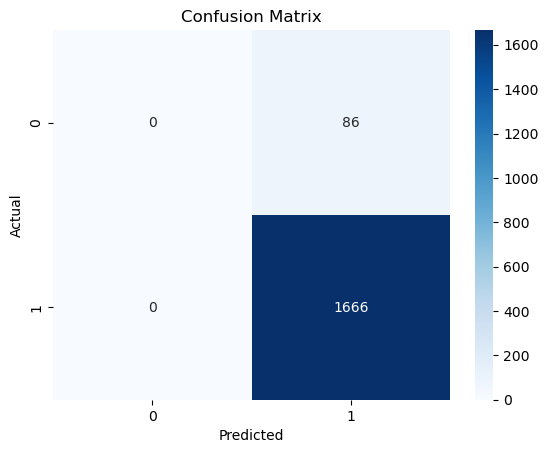

In [199]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_lr) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

## Gaussian Naive Bayes Algorithm

In [200]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [201]:
y_pred_nb = gnb.predict(x_test)

In [202]:
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.8898401826484018

In [203]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

     Holiday       0.11      0.17      0.13        86
  No Holiday       0.96      0.93      0.94      1666

    accuracy                           0.89      1752
   macro avg       0.53      0.55      0.54      1752
weighted avg       0.91      0.89      0.90      1752



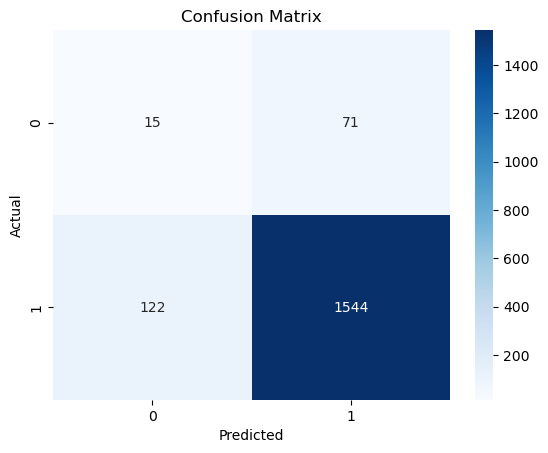

In [204]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_nb) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

## DecisionTreeClassifier Algorithm

In [205]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [206]:
y_pred_dt = dt.predict(x_test)

In [207]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 0.9868721461187214


In [208]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

     Holiday       0.86      0.87      0.87        86
  No Holiday       0.99      0.99      0.99      1666

    accuracy                           0.99      1752
   macro avg       0.93      0.93      0.93      1752
weighted avg       0.99      0.99      0.99      1752



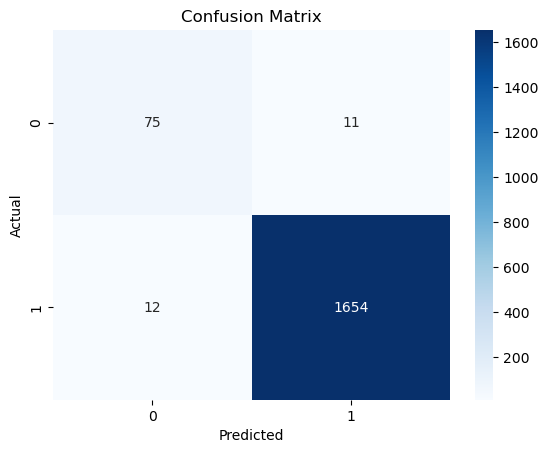

In [209]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_dt) 
# Plotting using heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

## Support Vector Classifier

In [211]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [212]:
y_pred_svc = svc.predict(x_test)

In [213]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.9509132420091324


In [214]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Classification Report:
               precision    recall  f1-score   support

     Holiday       0.00      0.00      0.00        86
  No Holiday       0.95      1.00      0.97      1666

    accuracy                           0.95      1752
   macro avg       0.48      0.50      0.49      1752
weighted avg       0.90      0.95      0.93      1752



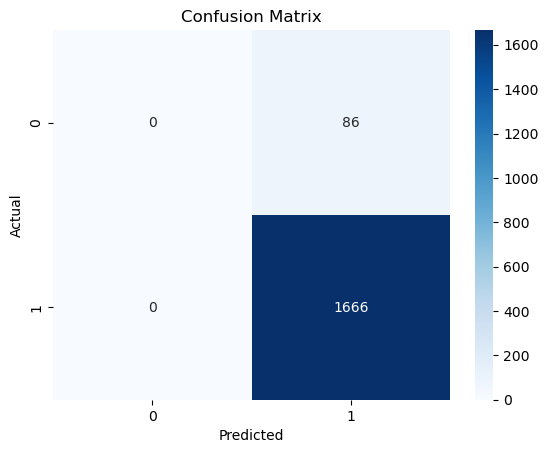

In [215]:
# Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_svc) 

#Heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show()

## Ensemble Learning - RandomForestClassifier

In [218]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [219]:
y_pred_rfc = rfc.predict(x_test)

In [220]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: ', accuracy)

Accuracy:  0.9908675799086758


In [221]:
# Classification Report
print('\n Classification Report: \n', classification_report(y_test, y_pred_rfc))


 Classification Report: 
               precision    recall  f1-score   support

     Holiday       1.00      0.81      0.90        86
  No Holiday       0.99      1.00      1.00      1666

    accuracy                           0.99      1752
   macro avg       1.00      0.91      0.95      1752
weighted avg       0.99      0.99      0.99      1752



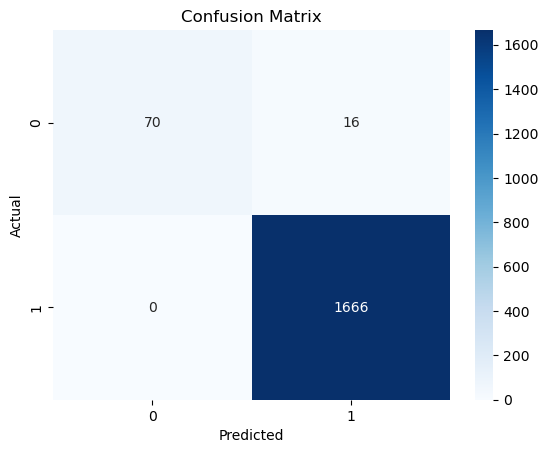

In [222]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()    

## Gradient Boosting Classifier

In [225]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [226]:
y_pred_gbc = gbc.predict(x_test)

In [227]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_gbc)
print('Accuracy: ', accuracy)

Accuracy:  0.9948630136986302


In [228]:
# Classification Report
print('\n Classification Report: \n', classification_report(y_test, y_pred_gbc))


 Classification Report: 
               precision    recall  f1-score   support

     Holiday       1.00      0.90      0.94        86
  No Holiday       0.99      1.00      1.00      1666

    accuracy                           0.99      1752
   macro avg       1.00      0.95      0.97      1752
weighted avg       0.99      0.99      0.99      1752



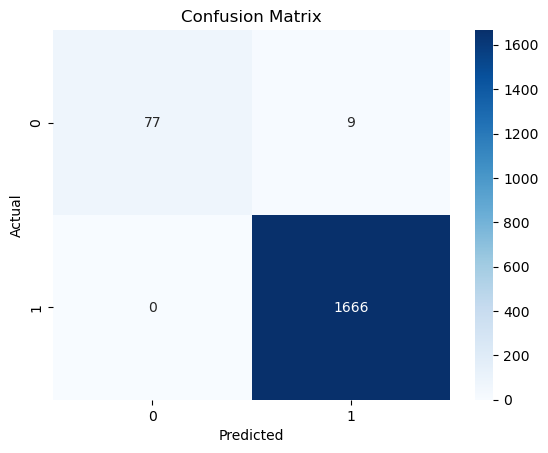

In [229]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()  

In [231]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME", n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

In [237]:
# Store results
scores = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Specify the positive class label for binary metrics
    pos_label = 'Holiday'  # Change this to whichever class you consider "positive"
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    
    # Alternative: use average parameter for multi-class classification
    # precision = precision_score(y_test, y_pred, average='weighted')
    # f1 = f1_score(y_test, y_pred, average='weighted')
    # recall = recall_score(y_test, y_pred, average='weighted')
    
    scores.append({
        "Model": name,
        "Accuracy": round(accuracy, 2),
        "Precision": round(precision, 2),
        "F1": round(f1, 2),
        "Recall": round(recall, 4)
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(scores)
print(results_df)

                 Model  Accuracy  Precision    F1  Recall
0  Logistic Regression      0.95       0.00  0.00  0.0000
1        Decision Tree      0.99       0.87  0.88  0.8837
2        Random Forest      0.99       1.00  0.88  0.7907
3             AdaBoost      0.96       1.00  0.19  0.1047
4    Gradient Boosting      0.99       1.00  0.94  0.8953


## Creating a Pipeline

In [252]:
pipeline = Pipeline([('Imputer', SimpleImputer(strategy = 'mean')),
                     ('Scaler', StandardScaler()),
                     ('Classifier', RandomForestClassifier(random_state = 42))])

In [253]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Classifier', RandomForestClassifier(random_state=42))])

### Saving the pipeline

In [255]:
joblib.dump(pipeline, 'Rental.joblib')

['Rental.joblib']

In [261]:
loaded_pipeline = joblib.load('Rental.joblib')

In [264]:
df_unseen = pd.read_csv('Unseen Rental.csv')
df_unseen

,Date,Rented Bike Count,Temperature(∞C),Humidity(%),Visibility (10m),Dew point temperature(∞C),Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday
0,1.484180e+18,253,-5.2,37,2000,-17.6,1,0,0,1,No Holiday
1,1.484180e+18,203,-5.5,38,2000,-17.6,1,0,0,1,No Holiday
2,1.484180e+18,172,-6.0,39,2000,-17.7,1,0,0,1,No Holiday
3,1.484180e+18,106,-6.2,40,2000,-17.6,1,0,0,1,No Holiday
4,1.484180e+18,77,-6.0,36,2000,-18.6,1,0,0,1,No Holiday
5,1.484180e+18,99,-6.4,37,2000,-18.7,1,0,0,1,No Holiday
6,1.484180e+18,180,-6.6,35,2000,-19.5,1,0,0,1,No Holiday
7,1.484180e+18,459,-7.4,38,2000,-19.3,1,0,0,1,No Holiday
8,1.484180e+18,918,-7.6,37,2000,-19.8,1,0,0,1,No Holiday
9,1.484180e+18,488,-6.5,27,1928,-22.4,1,0,0,1,No Holiday


In [265]:
x_unseen = df_unseen.drop('Holiday', axis = 1)

In [266]:
y_unseen = df_unseen['Holiday']

In [267]:
y_pred_unseen = loaded_pipeline.predict(x_unseen)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [268]:
# Accuracy
accuracy = accuracy_score(y_unseen, y_pred_unseen)
accuracy

1.0

In [269]:
df_unseen['Predicted'] = y_pred_unseen

In [270]:
df_unseen[['Holiday', 'Predicted']].head(10)

,Holiday,Predicted
0,No Holiday,No Holiday
1,No Holiday,No Holiday
2,No Holiday,No Holiday
3,No Holiday,No Holiday
4,No Holiday,No Holiday
5,No Holiday,No Holiday
6,No Holiday,No Holiday
7,No Holiday,No Holiday
8,No Holiday,No Holiday
9,No Holiday,No Holiday
